# a) Grafique las restricciones del problema. Pinte con color rojo el área que define el espacio factible del problema

* Se graficará la cantidad de arreglos F2 y F1 en el eje vertical y horizontal respectivamente. Para ello, se creará una función para cada restricción que recibirán como input la cantidad de arreglos florales F1 y retornarán la cantidad de arreglos florales F2. 
* Las variables $x_1$ y $x_2$ son las variables de decisión del problema y que corresponden a la cantidad de arreglos florales F1 y F2, respectivamente
* Para definir el valor que retornan las funciones, se expresará $x_2$ en función de $x_1$ en cada restricción del problema

In [1]:
clear % eliminamos todas las variables creadas previamente en Octave/Matlab

## i) Restricciones

### Disponibilidad de flores A

In [2]:
function x2 = floresA(x1)

    x2 = 90-2*x1;
    
end

### Disponibilidad de flores B

In [3]:
function x2 = floresB(x1)

    x2 = 50-x1;
    
end

### Disponibilidad de flores C

In [4]:
function x2 = floresC(x1)

    x2 = 40-(1/3)*x1;
    
end

* En Matlab, las funciones deben ser definidas al final del script. Esto es poco intuitivo y es una de las diferencias con Octave

### Gráfico restricciones

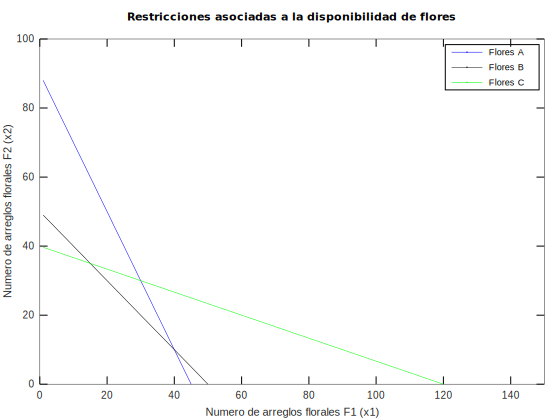

In [5]:
x1 = linspace(1,150); %Rango de valores de input de las funciones

plot(x1,floresA(x1),'b') %color azul para disponibilidad de flores A
hold on
plot(x1,floresB(x1),'k') %color negro para disponibilidad de flores B
hold on
plot(x1,floresC(x1),'g') %color verde para disponibilidad de flores C
title ('Restricciones asociadas a la disponibilidad de flores')
xlabel ('Numero de arreglos florales F1 (x1)')
ylabel ('Numero de arreglos florales F2 (x2)')
ylim([0 100])
xlim([0 150])
legend('Flores A','Flores B', 'Flores C')
hold off

### ii) Región factible

* La región factible corresponde al área donde todas las restricciones se cumplen. Esto incluye las restricciones de no negatividad asociadas a $x_1$ y $x_2$
* Los vértices de la región factible son 5 y corresponden a intersecciones entre distintos pares de restricciones. 
* El primer vértice es el origen (0,0) que denominaremos 'v1'. Los vertices 'v2','v3','v4','v5' son definidos según el sentido del reloj. 
* Los vértices v3 y v4 corresponden a intersecciones entre dos restricciones. La coordenada de cada vértice, se obtiene resolviendo sistemas de 2 ecuaciones. Para resolverlos, utilizaremos una clásica fórmula de álgebra lineal:

$$Ax = b \rightarrow x=A^{-1}b$$

#### Vértices

In [6]:
v1 =  [0,0]

v1 =

   0   0



In [7]:
v2 = (inv([1 3;1 0])*[120;0])' % O simplemente: v2 = [0,floresC(x1 = 0)]

v2 =

    0   40



In [8]:
v3 = (inv([1 1;1 3])*[50;120])' % Interseccion restricciones flores B y C

v3 =

   15.000   35.000



In [9]:
v4 = (inv([2 1;1 1])*[90;50])' % Interseccion restricciones flores A y B

v4 =

   40.000   10.000



In [10]:
v5 = (inv([2 1;0 1])*[90;0])'

v5 =

   45    0



#### Creamos una matriz de dos columnas con las coordenadas x e y de los vertices

In [11]:
v = [v1;v2;v3;v4;v5]

v =

    0.00000    0.00000
    0.00000   40.00000
   15.00000   35.00000
   40.00000   10.00000
   45.00000    0.00000



In [12]:
v(:,1)

ans =

    0.00000
    0.00000
   15.00000
   40.00000
   45.00000



In [13]:
v(:,2)

ans =

    0.00000
   40.00000
   35.00000
   10.00000
    0.00000



#### Gráfico de región factible

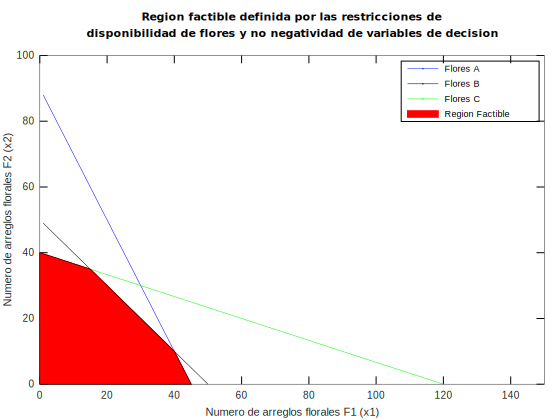

In [14]:
x1 = linspace(1,150); %Rango de valores de input para las funciones

plot(x1,floresA(x1),'b') %color azul para disponibilidad de flores A
hold on
plot(x1,floresB(x1),'k') %color negro para disponibilidad de flores B
hold on
plot(x1,floresC(x1),'g') %color verde para disponibilidad de flores C
fill(v(:,1),v(:,2),'r')
title ({'Region factible definida por las restricciones de' 'disponibilidad de flores y no negatividad de variables de decision'})
xlabel ('Numero de arreglos florales F1 (x1)')
ylabel ('Numero de arreglos florales F2 (x2)')
ylim([0 100])
xlim([0 150])
legend('Flores A','Flores B', 'Flores C','Region Factible')
hold off

# b) Agregue 3 curvas de nivel de la función objetivo en el gráfico. Una de las curvas debe corresponder a la solución óptima del problema

## Definición de curvas de nivel

La forma en que se determina la ecuación para encontrar las curvas de nivel de la función objetivo fue revisada en clases.

In [15]:
function x2 = curvadenivel(z,x1)

    x2 = z/6000-2/3*x1;
    
end

## Gráfico de las curvas de nivel

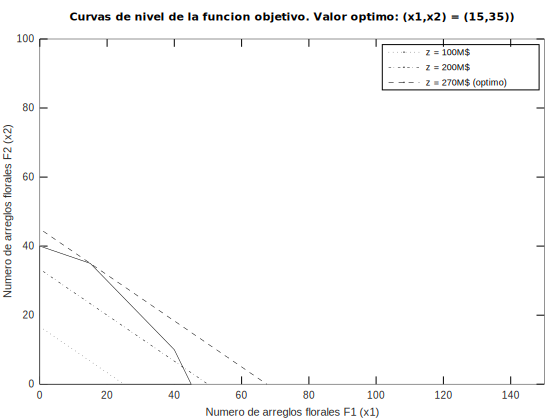

In [16]:
x1 = linspace(1,150); %Rango de valores de input para las funciones


fill(v(:,1),v(:,2),'w','EdgeColor','k')
hold on
c1 = plot(x1,curvadenivel(100000,x1),':k');
hold on
c2 = plot(x1,curvadenivel(200000,x1),'-.k');
hold on
c3 = plot(x1,curvadenivel(270000,x1),'--k'); %Curva de nivel en el valor óptimo (Vértice: x1 = 15, x2 = 35)
hold on
title ('Curvas de nivel de la funcion objetivo. Valor optimo: (x1,x2) = (15,35))')
xlabel ('Numero de arreglos florales F1 (x1)')
ylabel ('Numero de arreglos florales F2 (x2)')
ylim([0 100]);
xlim([0 150]);
legend([c1 c2 c3],'z = 100M$','z = 200M$', 'z = 270M$ (optimo)')
hold off

## Valor optimo

In [17]:
vopt = v3

vopt =

   15.000   35.000



In [18]:
FOopt = 4000*vopt(1)+6000*vopt(2)

FOopt =  270000


## c) Considere un caso donde el precio de venta del arreglo floral tipo 1 aumenta en un 50% y el de tipo 2 se reduce en un 50%. Repita lo hecho en (b) y analice si varía la solución óptima

* Realizar la solución de forma personal